In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from random import randint
from matplotlib import pyplot as plt
from scipy import ndimage

In [2]:
def get_images(directory):
    Images = []
    Image_Names = []
    for image_file in os.listdir(directory): #Extracting the file name of the image from Class Label folder
        image = cv2.imread(directory+'/'+image_file) #Reading the image (OpenCV)
        image = cv2.resize(image,(100,100)) #Resizing the image, Some images are different sizes.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#Changing colors of image to gray in order to get rid of 3.dimension(RGB)
        Images.append(image)
        Image_Names.append(image_file)#Taking years from image name
        
    return shuffle(Images,Image_Names,random_state=817328462) #Shuffling the dataset.

In [3]:
Images,Names = get_images("assignment_images") #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.

In [4]:
Year = []
for image_name in Names:
    Year.append(int(image_name[4:6]))
Year = np.array(Year)

In [5]:
len(Images)

900

In [6]:
Images[0]

array([[20, 19, 21, ..., 19, 20, 21],
       [20, 22, 22, ..., 19, 19, 20],
       [21, 21, 21, ..., 18, 18, 22],
       ...,
       [24, 23, 22, ..., 22, 21, 21],
       [21, 23, 27, ..., 20, 21, 19],
       [21, 27, 29, ..., 23, 21, 20]], dtype=uint8)

In [7]:
Year[0]

30

In [8]:
Images.shape

(900, 100, 100)

In [9]:
Blurred = list()
for image in Images:
    Blurred.append(cv2.GaussianBlur(image,(3,3),0))
Blurred = np.array(Blurred)

In [10]:
Canny = list()
for images in Blurred:
    edged_image = cv2.Canny(images,15,50)
    Canny.append(edged_image)
Canny = np.array(Canny)

In [11]:
Sobel = list()
for blurred_images in Blurred:
    sobel_images = cv2.Laplacian(blurred_images,cv2.CV_64F)
    Sobel.append(sobel_images)
Sobel = np.array(Sobel)

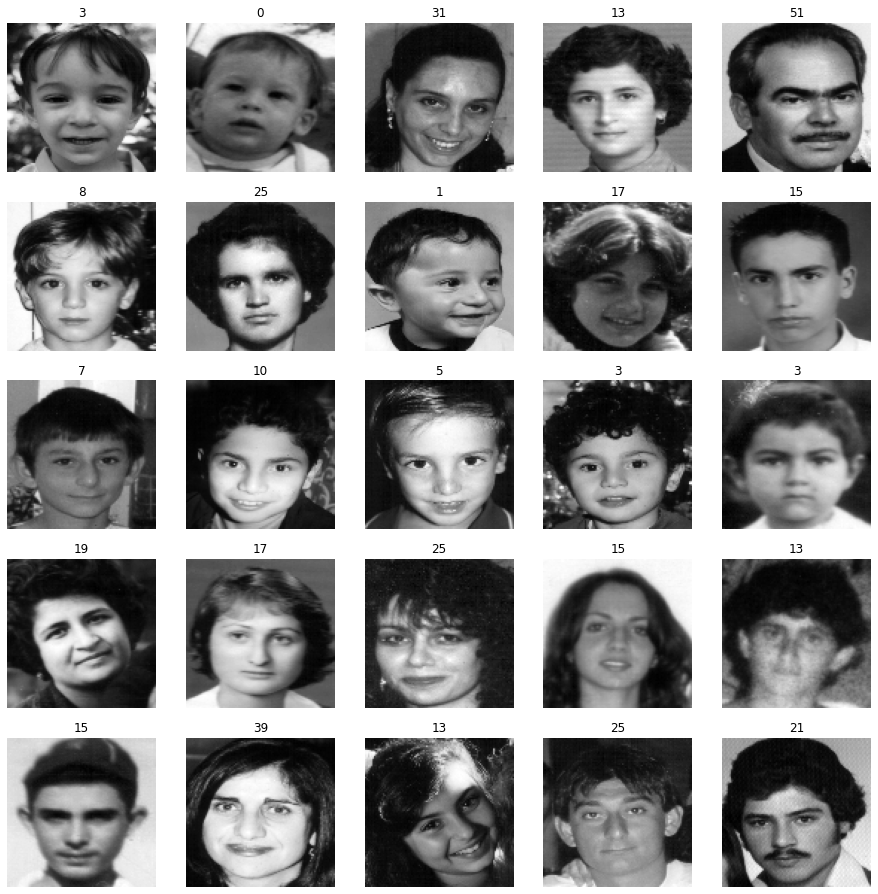

In [12]:
#Normal images
f,ax = plot.subplots(5,5) 
f.subplots_adjust(1,0,3,3)
for i in range(5):
    for j in range(5):
        rnd_number = randint(0,len(Images)-1)
        ax[i,j].imshow(Images[rnd_number], cmap = "gray")
        ax[i,j].set_title(Year[rnd_number])#Shows years
        ax[i,j].axis('off')

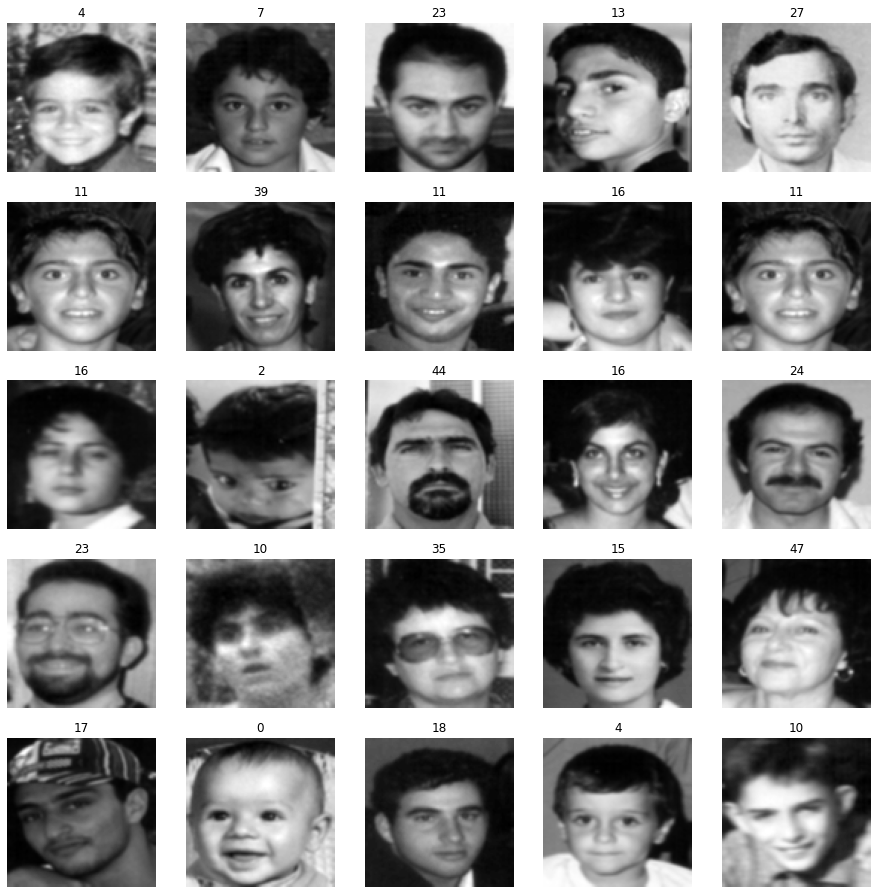

In [13]:
#Blurred images
f,ax = plot.subplots(5,5) 
f.subplots_adjust(1,0,3,3)
for i in range(5):
    for j in range(5):
        rnd_number = randint(0,len(Blurred)-1)
        ax[i,j].imshow(Blurred[rnd_number], cmap = "gray")
        ax[i,j].set_title(Year[rnd_number])#Shows years
        ax[i,j].axis('off')

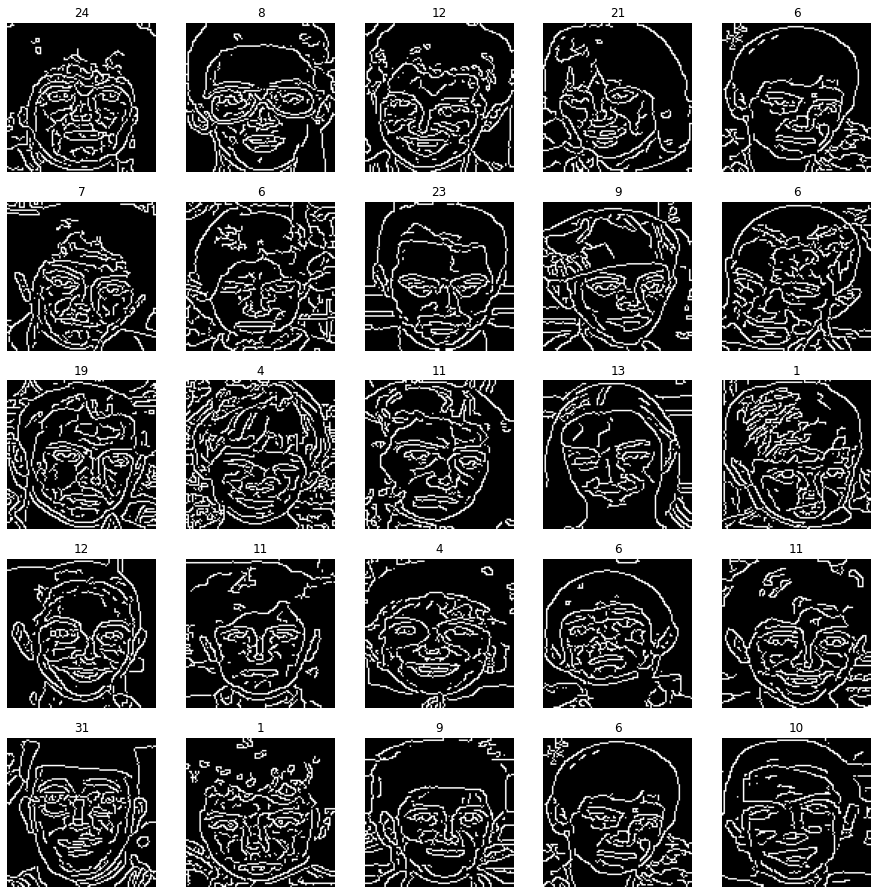

In [14]:
#Canny images
f,ax = plot.subplots(5,5) 
f.subplots_adjust(1,0,3,3)
for i in range(5):
    for j in range(5):
        rnd_number = randint(0,len(Canny)-1)
        ax[i,j].imshow(Canny[rnd_number], cmap = "gray")
        ax[i,j].set_title(Year[rnd_number])#Shows years
        ax[i,j].axis('off')

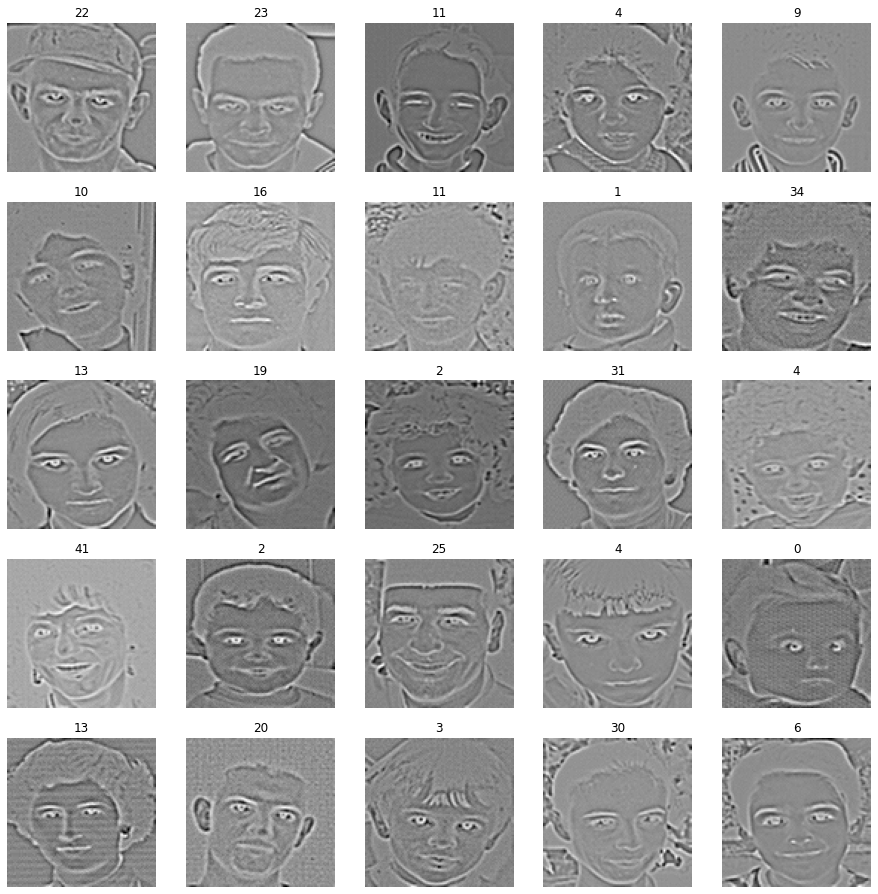

In [15]:
#Sobel images
f,ax = plot.subplots(5,5) 
f.subplots_adjust(1,0,3,3)
for i in range(5):
    for j in range(5):
        rnd_number = randint(0,len(Sobel)-1)
        ax[i,j].imshow(Sobel[rnd_number], cmap = "gray")
        ax[i,j].set_title(Year[rnd_number])#Shows years
        ax[i,j].axis('off')

In [16]:
#Reshaping all images from 2 dimensions to 1 dimension
Images = Images.reshape(900, 10000)
Blurred = Blurred.reshape(900, 10000)
Canny = Canny.reshape(900, 10000)
Sobel = Sobel.reshape(900, 10000)

In [17]:
Images[0]

array([20, 19, 21, ..., 23, 21, 20], dtype=uint8)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import mean

X_train, X_test, y_train, y_test = train_test_split(Images, Year, test_size=0.25, random_state=0)#Splitting normal image data
X_train2, X_test2, y_train2, y_test2 = train_test_split(Blurred, Year, test_size=0.25, random_state=0)#Splitting blurred image data
X_train3, X_test3, y_train3, y_test3 = train_test_split(Canny, Year, test_size=0.25, random_state=0)#Splitting normal image data
X_train4, X_test4, y_train4, y_test4 = train_test_split(Sobel, Year, test_size=0.25, random_state=0)

# KNN CLASSIFIER

In [19]:
class KNNClassifier(BaseEstimator):
    def __init__(self, n_neighbors = 5):
        self.n_neighbors = n_neighbors
        self.fit()
    def euclidean_distance(self, x_train_row, x_test_row):# calculate the Euclidean distance between two vectors
        distance = 0.0
        distance += np.linalg.norm(x_train_row - x_test_row)
        return distance
    def get_neighbors(self, x_train, y_train, x_test_row):# Locate the most similar neighbors
        distances = list()
        for i in range(len(x_train)):
            dist = self.euclidean_distance(x_train[i], x_test_row)
            distances.append((x_train[i], y_train[i], dist))
        distances.sort(key=lambda tup: tup[2])
        neighbors = list()
        for i in range(self.n_neighbors):
            neighbors.append(distances[i][1])
        return neighbors
    def predict_classification(self, x_train, y_train, x_test_row):# Make a prediction with neighbors
        neighbors = self.get_neighbors(x_train, y_train, x_test_row)
        output_values = [i for i in neighbors]
        prediction = (sum(output_values) // self.n_neighbors)
        return round(prediction,ndigits=1)
    def predict(self, x_test):# Gather all predictions in a list
        predicts = []
        for x_test_row in x_test:
            pred_value = self.predict_classification(self.x_train, self.y_train, x_test_row)
            predicts.append(pred_value)
        return np.array(predicts)
    def fit(self, x_train = np.array([]), y_train = np.array([])):
        self.x_train = x_train
        self.y_train = y_train

KNN Classify With Normal Image Pixels

In [20]:
# create model
model1 = KNNClassifier(n_neighbors = 10)
# evaluate model
scores = abs(cross_val_score(model1, X_train, y_train, scoring="neg_mean_absolute_error", cv=10, n_jobs=-1))
# report performance
print('Mean Absolute Error(KNN-Normal): %.2f' % (mean(scores)))#Average mae of k-folds

Mean Absolute Error(KNN-Normal): 9.51


KNN Classify With Blurred Image Pixels

In [21]:
# create model
model2 = KNNClassifier(n_neighbors = 10)
# evaluate model
scores = abs(cross_val_score(model2, X_train2, y_train2, scoring="neg_mean_absolute_error", cv=10, n_jobs=-1))
# report performance
print('Mean Absolute(KNN-Blurred): %.2f' % (mean(scores)))#Average mae of k-folds

Mean Absolute(KNN-Blurred): 9.53


KNN Classify With Canny Images

In [22]:
# create model
model3 = KNNClassifier(n_neighbors = 10)
# evaluate model
scores = abs(cross_val_score(model3, X_train3, y_train3, scoring="neg_mean_absolute_error", cv=10, n_jobs=-1))
# report performance
print('Mean Absolute(KNN-Canny): %.2f' % (mean(scores)))#Average mae of k-folds

Mean Absolute(KNN-Canny): 9.74


KNN Classify With Sobel Images

In [23]:
# create model
model4 = KNNClassifier(n_neighbors = 10)
# evaluate model
scores = abs(cross_val_score(model4, X_train4, y_train4, scoring="neg_mean_absolute_error", cv=10, n_jobs=-1))
# report performance
print('Mean Absolute(KNN-Sobel): %.2f' % (mean(scores)))#Average mae of k-folds

Mean Absolute(KNN-Sobel): 9.87


# WEIGHTED KNN CLASSIFIER

In [24]:
class WeightedKNNClassifier(BaseEstimator):
    def __init__(self, n_neighbors = 5):
        self.n_neighbors = n_neighbors
        self.fit()
# calculate the Euclidean distance between two vectors
    def euclidean_distance(self, x_train_row, x_test_row):
        distance = 0.0
        distance += np.linalg.norm(x_train_row - x_test_row)
        return distance
# Locate the most similar neighbors
    def get_neighbors(self, x_train, y_train, x_test_row):
        distances = list()
        for i in range(len(x_train)):
            dist = self.euclidean_distance(x_train[i], x_test_row)
            distances.append((x_train[i], y_train[i], dist))
        distances.sort(key=lambda tup: tup[2])
        neighbors = list()
        for i in range(self.n_neighbors):
            neighbors.append((distances[i][1],distances[i][2]))
        return neighbors
# Make a prediction with neighbors
    def predict_classification(self, x_train, y_train, x_test_row):
        neighbors = self.get_neighbors(x_train, y_train, x_test_row)
        degerler_toplam = 0
        katsayi_toplam = 0
        katsayi = 1
        if(len(neighbors) != 1):
            for i in neighbors:
                for j in neighbors:
                    if (j != i):
                        katsayi = katsayi * j[1]
                        katsayi_toplam += katsayi
                        degerler_toplam += katsayi * i[0]
                katsayi = 1
            prediction = (degerler_toplam // katsayi_toplam)
        else:
            prediction = neighbors[0][0]
        return round(prediction,ndigits=1)
# Gather all predictions in a list
    def predict(self, x_test):
        predicts = []
        for x_test_row in x_test:
            predicts.append(self.predict_classification(self.x_train, self.y_train, x_test_row))
        return np.array(predicts)
    
    def fit(self, x_train = np.array([]), y_train = np.array([])):
        self.x_train = x_train
        self.y_train = y_train
    

Weighted KNN Classify With Normal Image Pixels

In [25]:
# create model
model5 = WeightedKNNClassifier(n_neighbors = 10)
# evaluate model
scores = abs(cross_val_score(model5, X_train, y_train, scoring="neg_mean_absolute_error", cv=10, n_jobs=-1))
# report performance
print('Mean Absolute Error(WeightedKNN-Normal): %.2f' % (mean(scores)))#Average mae of k-folds

Mean Absolute Error(WeightedKNN-Normal): 9.51


Weighted KNN Classify With Blurred Image Pixels

In [26]:
# create model
model6 = WeightedKNNClassifier(n_neighbors = 10)
# evaluate model
scores = abs(cross_val_score(model6, X_train2, y_train2, scoring="neg_mean_absolute_error", cv=10, n_jobs=-1))
# report performance
print('Mean Absolute Error(WeightedKNN-Blurred): %.2f' % (mean(scores)))#Average mae of k-folds

Mean Absolute Error(WeightedKNN-Blurred): 9.53


KNN Classify With Canny Images

In [27]:
# create model
model7 = WeightedKNNClassifier(n_neighbors = 10)
# evaluate model
scores = abs(cross_val_score(model7, X_train3, y_train3, scoring="neg_mean_absolute_error", cv=10, n_jobs=-1))
# report performance
print('Mean Absolute(KNN-Canny): %.2f' % (mean(scores)))#Average mae of k-folds

Mean Absolute(KNN-Canny): 9.75


KNN Classify With Sobel Images

In [28]:
# create model
model8 = WeightedKNNClassifier(n_neighbors = 10)
# evaluate model
scores = abs(cross_val_score(model8, X_train4, y_train4, scoring="neg_mean_absolute_error", cv=10, n_jobs=-1))
# report performance
print('Mean Absolute(KNN-Sobel): %.2f' % (mean(scores)))#Average mae of k-folds

Mean Absolute(KNN-Sobel): 9.87


# TEST IMAGES PART

In [29]:
#Test_Images,Test_Names = get_images("kaggle_images") #Extract the training images from the folders.

#Test_Images = np.array(Test_Images) #converting the list of images to numpy array.

In [30]:
#Blurred_Test = list()
#for image in Test_Images:
#    Blurred_Test.append(skimage.filters.gaussian(image, truncate=3.5))
#Blurred_Test = np.array(Blurred_Test)

In [31]:
#Blurred_Test.shape

In [32]:
#Blurred_Test = Blurred_Test.reshape(102, 10000)

In [33]:
#model5 = WeightedKNNClassifier(n_neighbors = 10)
#model5.fit(Blurred, Year)
#prediction = model5.predict(Blurred_Test)

In [34]:
#len(prediction)

In [35]:
#guess_df = pd.DataFrame({"Name":Test_Names, "Age":prediction})
#guess_df.head()

In [36]:
#guess_df.to_csv ("Test_Prediction.csv", index = False, header=True)